## Census Income Dataset

## Problem Statement :
The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not.

## About the dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  

The data has 1032 instances and 15 features. For your information the target variable `Income` has already been label encoded.
1 indicates the income is greater than or equal to 50K. 0 indicates the income is less than 50K. Below is a brief about the features in the dataset.

|Features|Description|
|-----|-----|
|age|Age of the person|
|Workclass|Categorical variable having 8 categories each denoting the type of employment|
|fnlwgt|final weight. |
|education|Categorical variable with 16 categories each denoting the qualification of the person.|
|education-num|number of years of education|
|marital-status|Categorical variable with 7 categories|
|occupation|Categorical variable with 14 categories each denoting the type of occupation of the individual|
|relationship|Categorical variable with 6 categories.|
|race|Categorical variable with 5 categories each denoting the ethnicity of the individual|
|sex|Gender of the person|
|capital-gain|Continuous| 
|capital-loss|Continuous|
|hours-per-week|Working hours per week|
|native-country|Categorical|
|Income|Target variable. 1 indicates >=50k. 0 indicates <50K|



### Reading the data using pandas module.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('data/adult_preprocessed.csv',index_col=0)

In [3]:
dataframe.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Check for null values and get a summary of all the columns in the dataset

In [4]:
# Check for null values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1119
Data columns (total 15 columns):
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(7), object(8)
memory usage: 129.0+ KB


In [5]:
dataframe.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [6]:
dataframe.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


### For further analysis split to bring all the continuous variables together and categorical variables together.

In [7]:
# Seperate continuous variables and categorical variables
dataframe_num = dataframe.select_dtypes(include='int64')       #include=np.number
dataframe_cat = dataframe.select_dtypes(exclude='int64')

In [8]:
dataframe_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [9]:
dataframe_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


###  Plotting a stacked bar chart, have an estimate of the number of people with income above and below 50K with respect to each of the categorical features

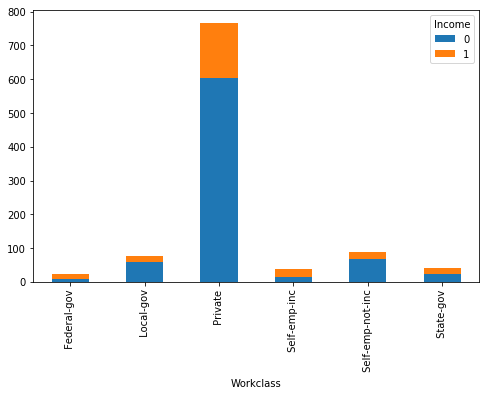

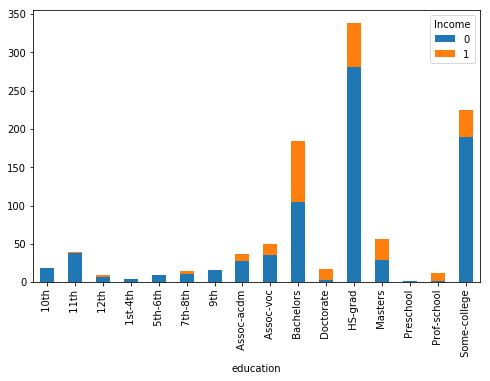

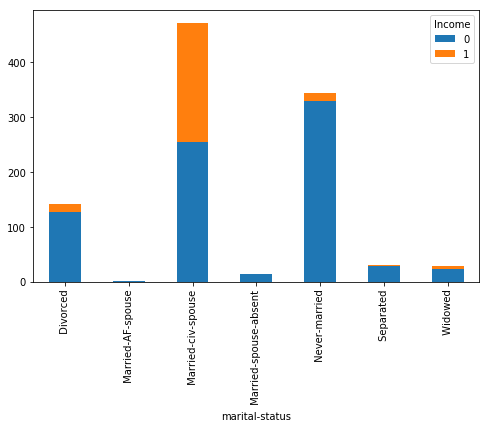

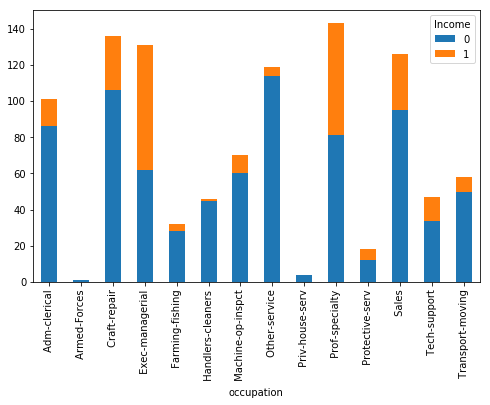

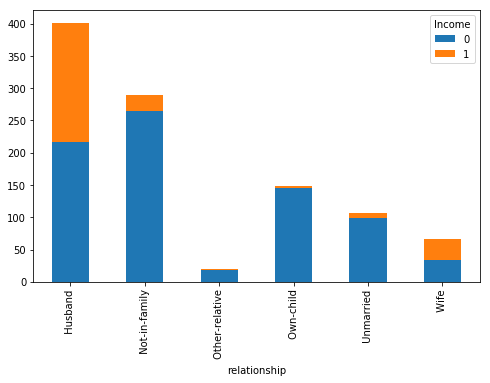

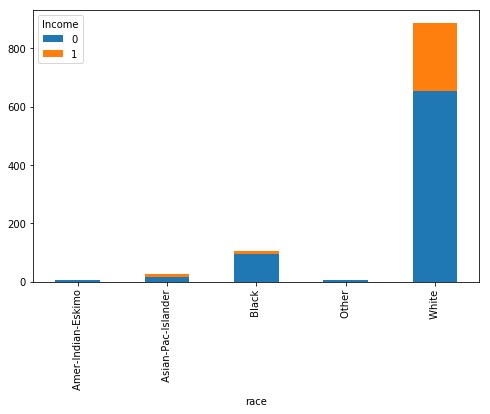

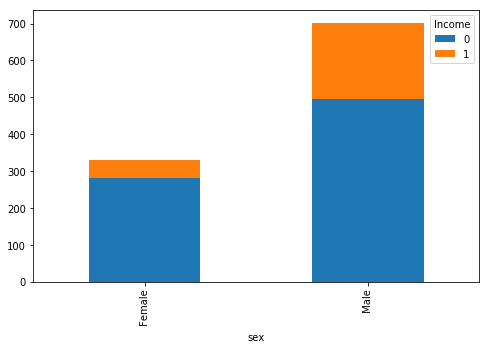

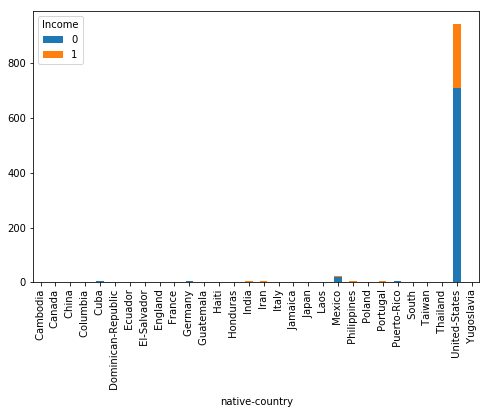

In [10]:
for i in dataframe_cat:
    dataframe.groupby(i)['Income'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(8,5))

### Plot a histogram for all the continuous variables to check for skewness

In [11]:
import matplotlib.pyplot as plt

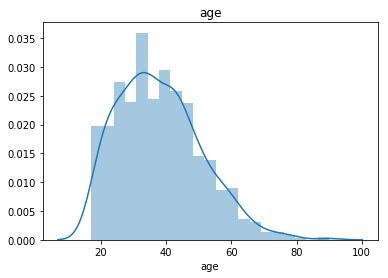

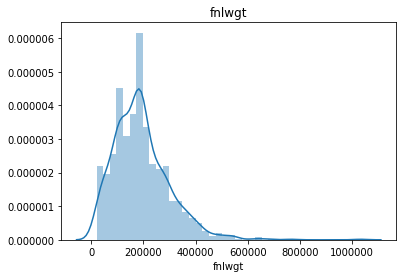

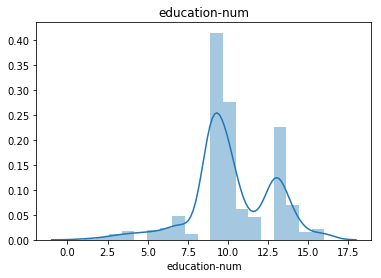

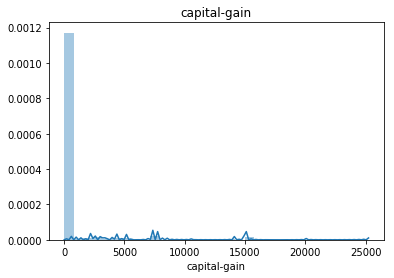

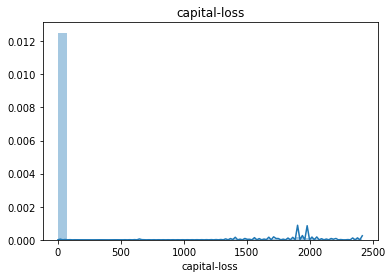

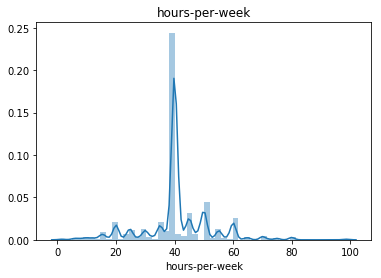

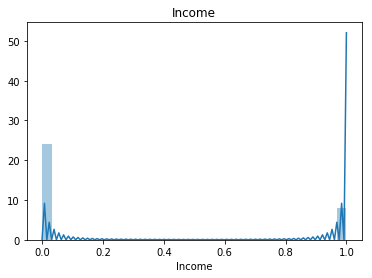

In [12]:
for i in dataframe_num:
    plt.title(i)
    sns.distplot(dataframe_num[i])
    plt.show()

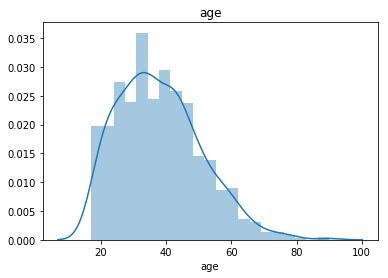

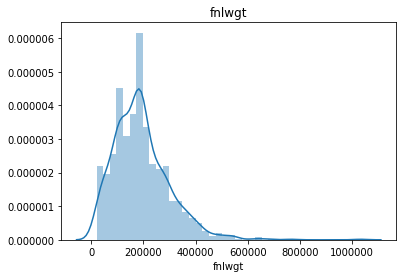

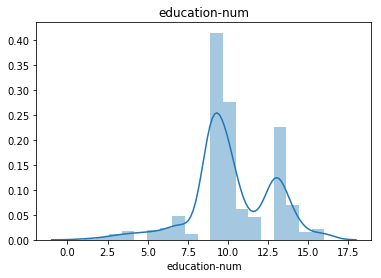

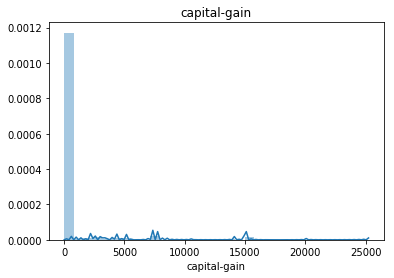

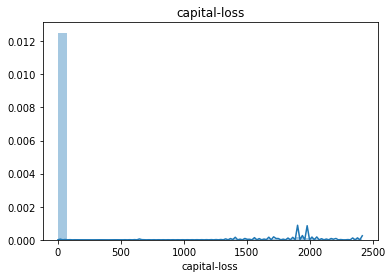

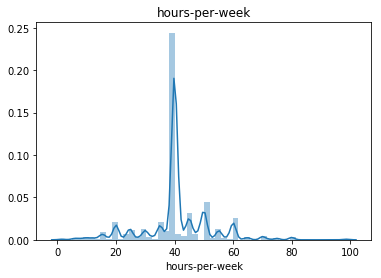

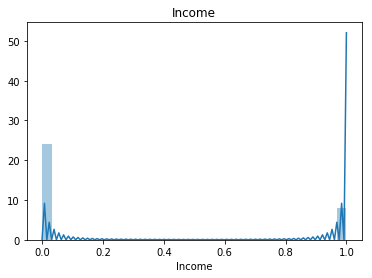

In [16]:
import seaborn as sns
for i in dataframe_num:
    plt.title(i)
    #plt.hist(dataframe_con[i])
    sns.distplot(dataframe_num[i])
    plt.show()

### Majority of values in capital-gain and capital-loss are zeros. So remove the columns

In [17]:
dataframe_num.drop(['capital-gain','capital-loss'],1, inplace=True)

In [18]:
dataframe_num.head()

,age,fnlwgt,education-num,hours-per-week,Income
0,39,77516,13,40,0
1,50,83311,13,13,0
2,38,215646,9,40,0
3,53,234721,7,40,0
4,28,338409,13,40,0


### Check for skewness in the continuous data

In [19]:
list(dataframe_num.columns)

['age', 'fnlwgt', 'education-num', 'hours-per-week', 'Income']

In [20]:
dataframe_num.skew()

age               0.616951
fnlwgt            1.395785
education-num    -0.302642
hours-per-week    0.163424
Income            1.180474
dtype: float64

In [22]:
df_skew = pd.DataFrame(data={'column': list(dataframe_num.columns), 'skew': skew(dataframe_num)})
df_skew

,column,skew
0,age,0.616053
1,fnlwgt,1.393756
2,education-num,-0.302202
3,hours-per-week,0.163186
4,Income,1.178758


### The column `fnlwgt` is a highly right skewed column. Remove the skewness using a log transform and then check if the skewness has been removed by plotting its histogram

In [23]:
dataframe_num['fnlwgt'] = np.log1p(dataframe_num['fnlwgt'])

In [24]:
skew(dataframe_num['fnlwgt'])

-0.7759951467252276

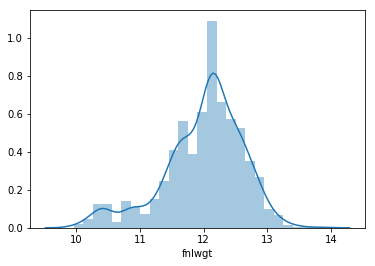

In [25]:
sns.distplot(dataframe_num['fnlwgt'])

### Check for the pearson correlation between the continuous variables by plotting a heatmap

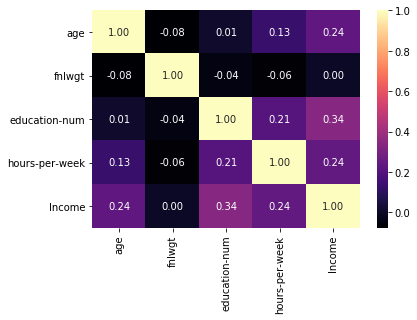

In [26]:
# Check for correlation between continuous variables
sns.heatmap(dataframe_num.corr(), cmap='magma', annot=True, fmt='.2f')

### Label Encode all the categorical variables

In [27]:
dataframe_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [28]:
# Label Encode Categorical variables
le=LabelEncoder()

In [30]:
for column in dataframe_cat:
    dataframe_cat[column] = le.fit_transform(dataframe_cat[column])
dataframe_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


### Concatenate both the continuous and categorical dataframes

In [32]:
dataframe_num.head()

,age,fnlwgt,education-num,hours-per-week,Income
0,39,11.258253,13,40,0
1,50,11.330348,13,13,0
2,38,12.281398,9,40,0
3,53,12.366157,7,40,0
4,28,12.732013,13,40,0


In [33]:
df = pd.concat([dataframe_cat, dataframe_num], axis=1)

In [34]:
df.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,hours-per-week,Income
0,5,9,4,0,1,4,1,28,39,11.258253,13,40,0
1,4,9,2,3,0,4,1,28,50,11.330348,13,13,0
2,2,11,0,5,1,4,1,28,38,12.281398,9,40,0
3,2,1,2,5,0,2,1,28,53,12.366157,7,40,0
4,2,9,2,9,5,2,0,4,28,12.732013,13,40,0


### Split into features and target

In [35]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Fit a StandardScaler on the features

In [38]:
# Fitting a Standard Scaler 
ss = StandardScaler()
X = ss.fit_transform(X)

### Convert array to a dataframe

In [39]:
type(X)

numpy.ndarray

In [40]:
X

array([[ 3.02699273, -0.37978875,  0.93513188, ..., -1.17271101,
         1.11105213, -0.06021656],
       [ 1.94156657, -0.37978875, -0.40243721, ..., -1.05783935,
         1.11105213, -2.36182721],
       [-0.22928576,  0.1679988 , -1.7400063 , ...,  0.45749756,
        -0.48867692, -0.06021656],
       ...,
       [-0.22928576,  0.1679988 , -0.40243721, ...,  0.54376775,
        -0.48867692,  0.79223183],
       [-1.31471192, -0.37978875, -0.40243721, ...,  0.37890437,
         1.11105213, -0.06021656],
       [-0.22928576, -0.37978875, -0.40243721, ...,  0.91859227,
         1.11105213, -0.06021656]])

In [41]:
columns = list(df.columns)

In [42]:
columns.pop()

'Income'

In [43]:
columns[:]

['Workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'age',
 'fnlwgt',
 'education-num',
 'hours-per-week']

In [44]:
X = pd.DataFrame(X, columns=columns[:])

In [45]:
type(X)

pandas.core.frame.DataFrame

In [46]:
X.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,hours-per-week
0,3.026993,-0.379789,0.935132,-1.570166,-0.294678,0.390011,0.687155,0.260938,0.081561,-1.172711,1.111052,-0.060217
1,1.941567,-0.379789,-0.402437,-0.819975,-0.902893,0.390011,0.687155,0.260938,0.939653,-1.057839,1.111052,-2.361827
2,-0.229286,0.167999,-1.740006,-0.319849,-0.294678,0.390011,0.687155,0.260938,0.003553,0.457498,-0.488677,-0.060217
3,-0.229286,-2.570939,-0.402437,-0.319849,-0.902893,-2.079263,0.687155,0.260938,1.173678,0.592547,-1.288541,-0.060217
4,-0.229286,-0.379789,-0.402437,0.680405,2.138182,-2.079263,-1.455275,-5.619778,-0.776531,1.175477,1.111052,-0.060217


### Split into train and validation data

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

### Fit a logistic regression model

In [49]:
logreg = LogisticRegression()

In [50]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
y_pred = logreg.predict(X_test)

In [52]:
logreg.coef_

array([[-0.00462468, -0.12605553, -0.40735442, -0.13469539, -0.03755165,
         0.07607611,  0.2664232 ,  0.00731805,  0.63070804,  0.10385773,
         0.91773654,  0.39489557]])

### Checking the accuracy, f1_score, confusion matrix

In [53]:
#accuracy_score,classification_report,f1_score,confusion_matrix
accuracy_score(y_test, y_pred)

0.8164251207729468

In [54]:
print(confusion_matrix(y_test, y_pred))

[[153  11]
 [ 27  16]]


In [55]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tp, fp)
print(fn, tn)

16 11
27 153


In [56]:
f1_score(y_test, y_pred)

0.45714285714285713

In [57]:
from sklearn.metrics import precision_score, recall_score

In [58]:
precision_score(y_test, y_pred)

0.5925925925925926

In [59]:
recall_score(y_test, y_pred)

0.37209302325581395

### Perform hyperparameter tuning using GridSearch

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
params = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(estimator=logreg, param_grid=params,scoring='f1',cv=10)
grid_search.fit(X_train,y_train)
y_pred_grid_search = grid_search.predict(X_test)

### Find the best parameters and the metrics after grid search

In [62]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [63]:
f1_score(y_test, y_pred_grid_search)

0.5060240963855422

In [64]:
from sklearn.metrics import roc_auc_score

In [70]:
print((confusion_matrix(y_test,y_pred_grid_search)))

[[145  19]
 [ 22  21]]


In [65]:
roc_auc_score(y_test, y_pred)

0.6525099262620533

In [66]:
roc_auc_score(y_test, y_pred_grid_search)

0.6862592172433353